In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from itertools import izip

%matplotlib inline

get_ipython().magic(u'load_ext autoreload')
get_ipython().magic(u'autoreload 2')

get_ipython().magic(u"config InlineBackend.figure_formats = 'png', ")

mpl.rcParams['figure.figsize'] = (7.0, 4.0)  # default size of plots
mpl.rcParams['axes.labelsize'] = 30
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['ytick.minor.size'] = 5
mpl.rcParams['legend.framealpha'] = 0.6
mpl.rcParams['legend.scatterpoints'] = 1
mpl.rcParams.update({'font.size': 24, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})


In [40]:
from common_plots import *

In [41]:
# Extract dataframes from binary
store = pd.HDFStore("points_MICRO_SCAN_I42_NTv482_HBv421_M3MQ3MU3MD3AU3AD3_30_Oct_15_1046.h5")
df_orig = store.full12loop_all
df_pass_all = store.full12loop_good_posMuMagMom_planckUpperOnly #'relaxed' constraints - +ve g-2 and omegah^2
store.close()

In [42]:
# Make subsets based on masses, and passing ALL NMSSMTools constraints (i.e. don't ignore g-2 and relic density)
from make_hdf5 import subset_var
df_pass_all_h1 = subset_var(df_pass_all, 122.1, 128.1, 'mh1')
df_pass_all_h2 = subset_var(df_pass_all, 122.1, 128.1, 'mh2')
df_pass_all_strict = df_pass_all[df_pass_all.constraints == ""]


In [43]:
# df_pass_all.head().T

In [44]:
print 'Original points (no constraints):', len(df_orig.index) 
print 'With relaxed constraints (on g-2, relic density & some LHC constraints):', len(df_pass_all.index)
print 'Strictly enforcing all constraints in NMSSMTools 4.8.2:',len(df_pass_all_strict.index)
print 'Strictly enforcing all constraints in NMSSMTools 4.8.2 and ma1 < 10:',len(df_pass_all_strict[df_pass_all_strict.ma1<10].index)

Original points (no constraints): 966368
With relaxed constraints (on g-2, relic density & some LHC constraints): 196853
Strictly enforcing all constraints in NMSSMTools 4.8.2: 1430
Strictly enforcing all constraints in NMSSMTools 4.8.2 and ma1 < 10: 21


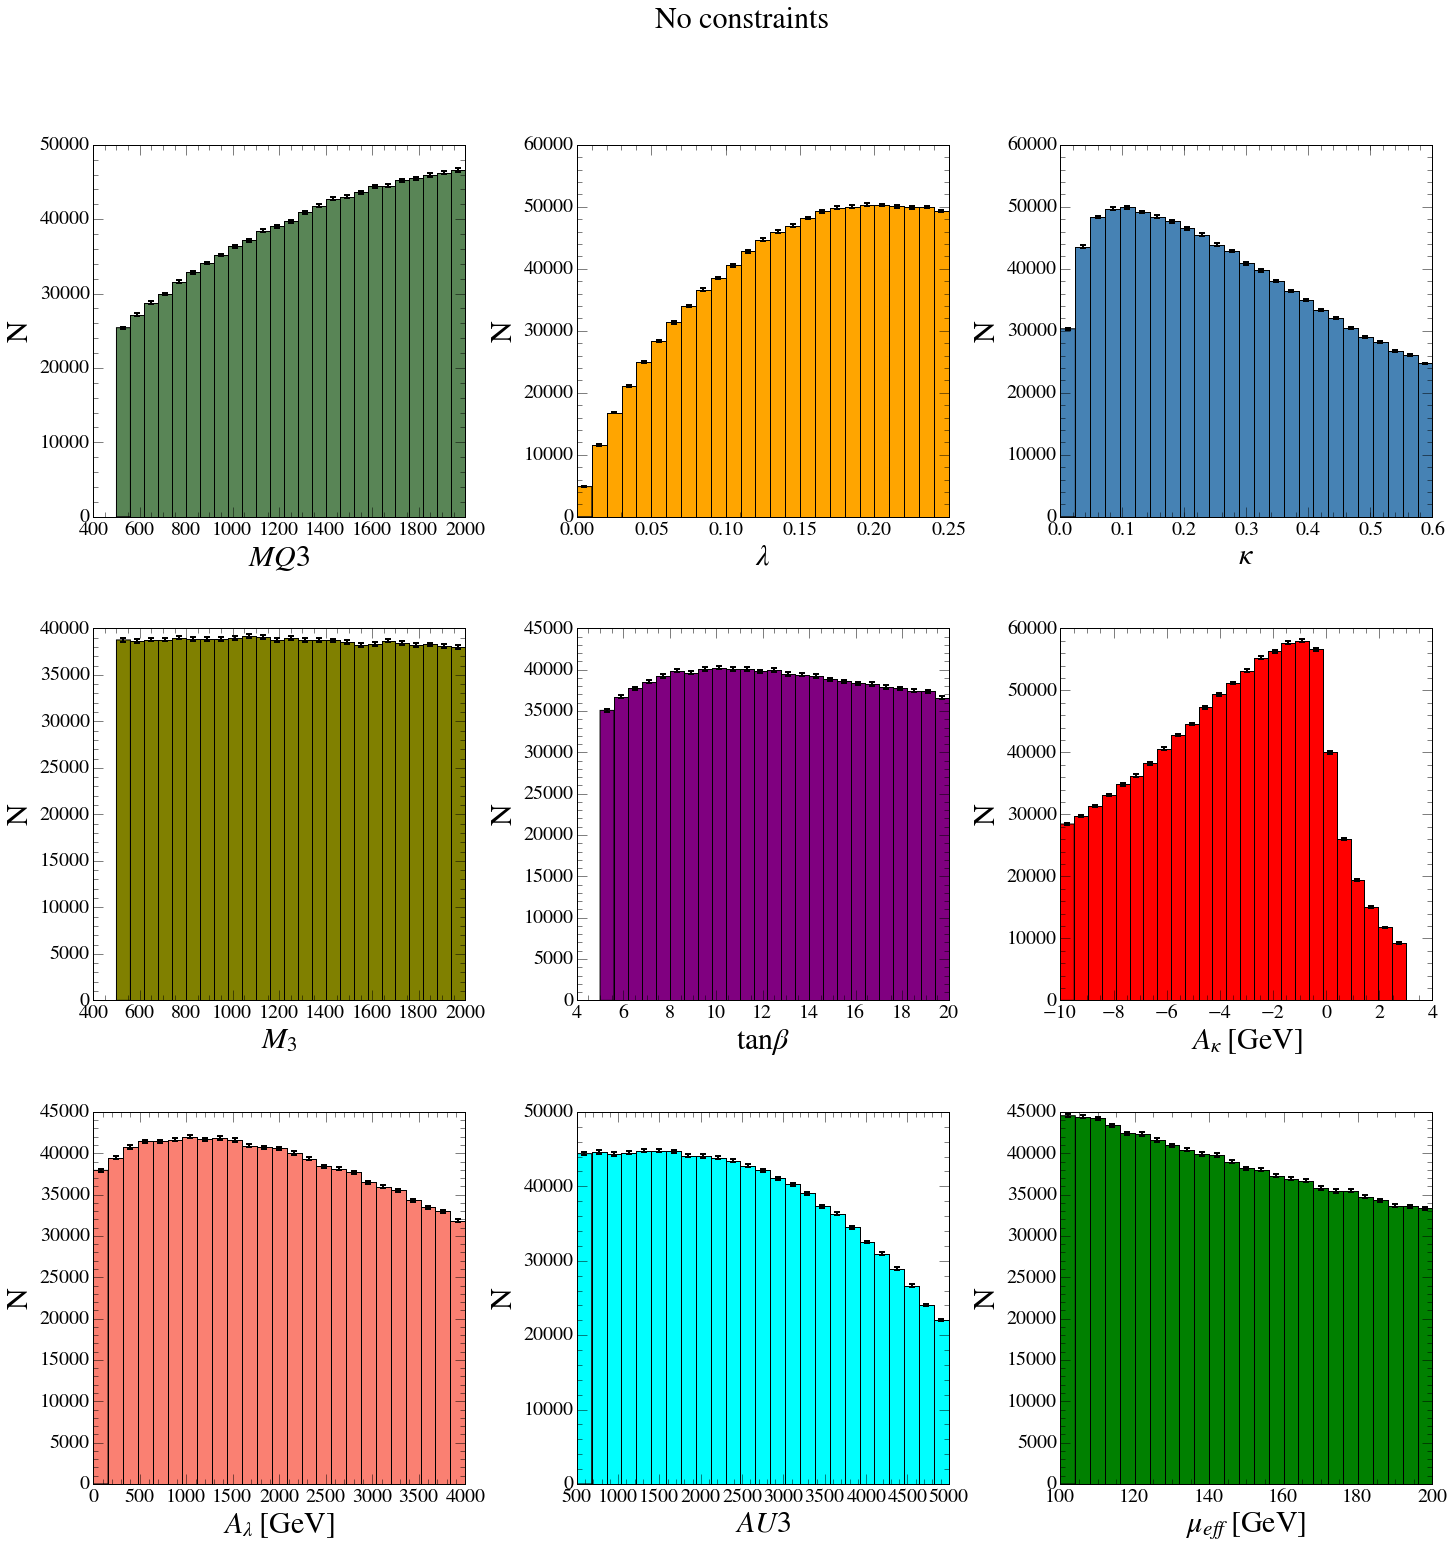

In [45]:
plot_input_params_hists(df_orig, "N", "No constraints", bins=25, param_dict=nmssm_params_extended)

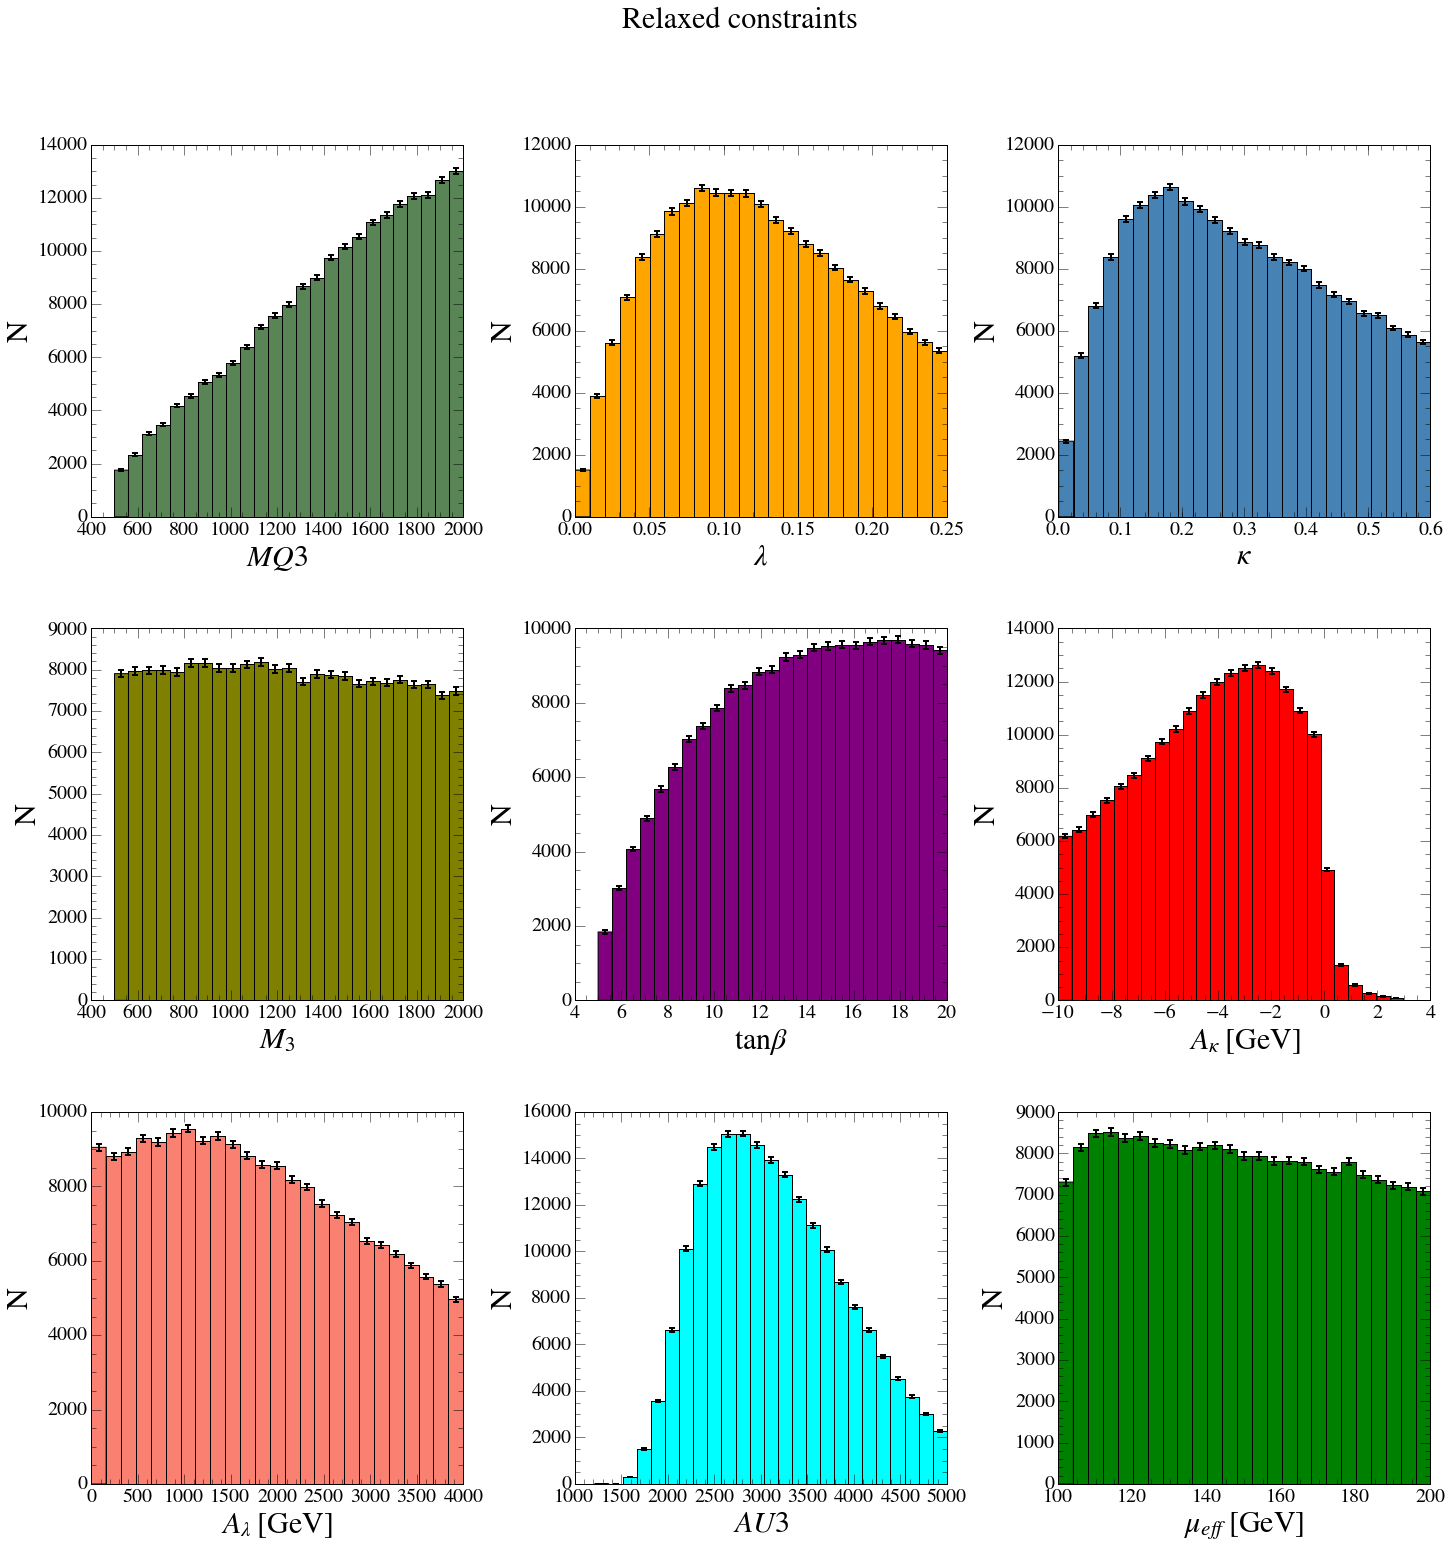

In [46]:
plot_input_params_hists(df_pass_all, "N", "Relaxed constraints", bins=25, param_dict=nmssm_params_extended)

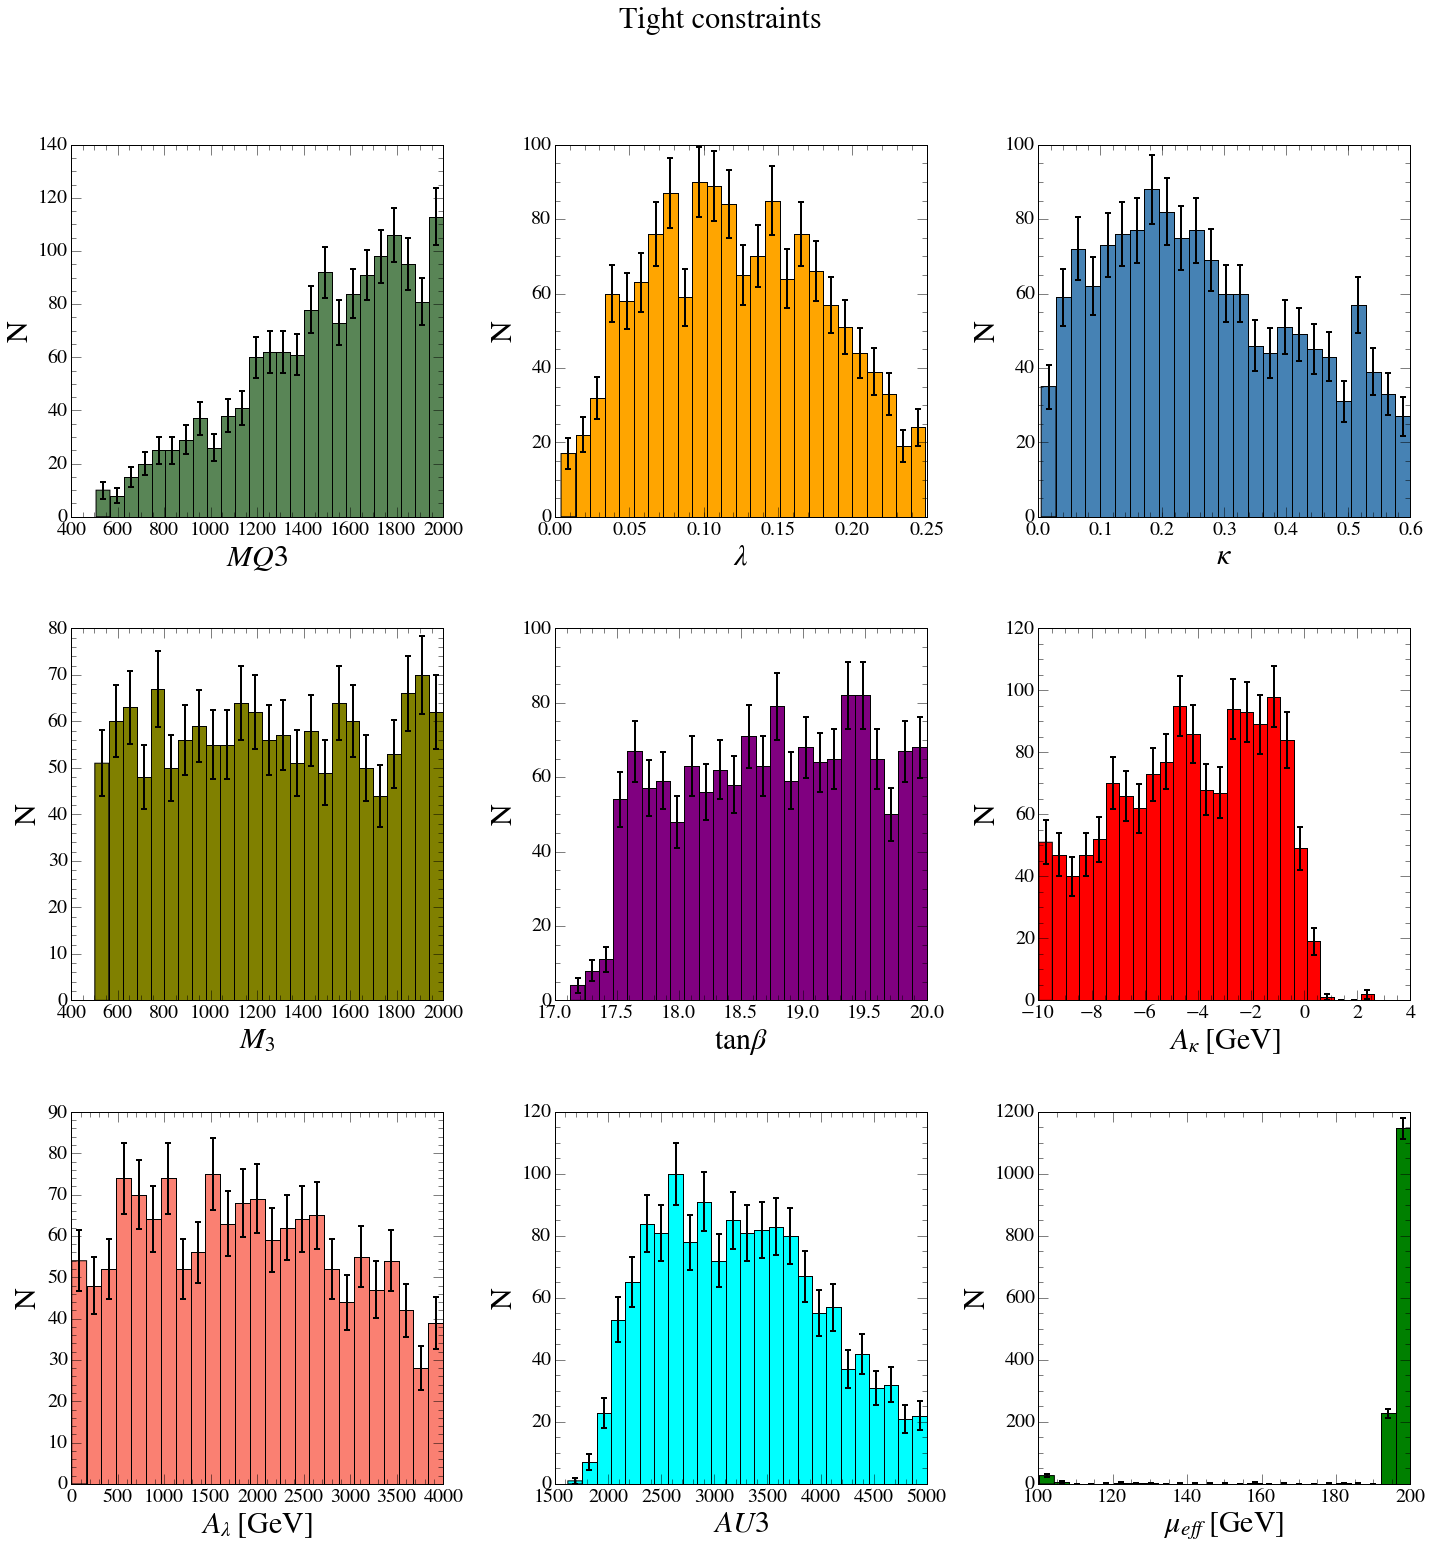

In [47]:
plot_input_params_hists(df_pass_all_strict, "N", "Tight constraints", bins=25, param_dict=nmssm_params_extended)

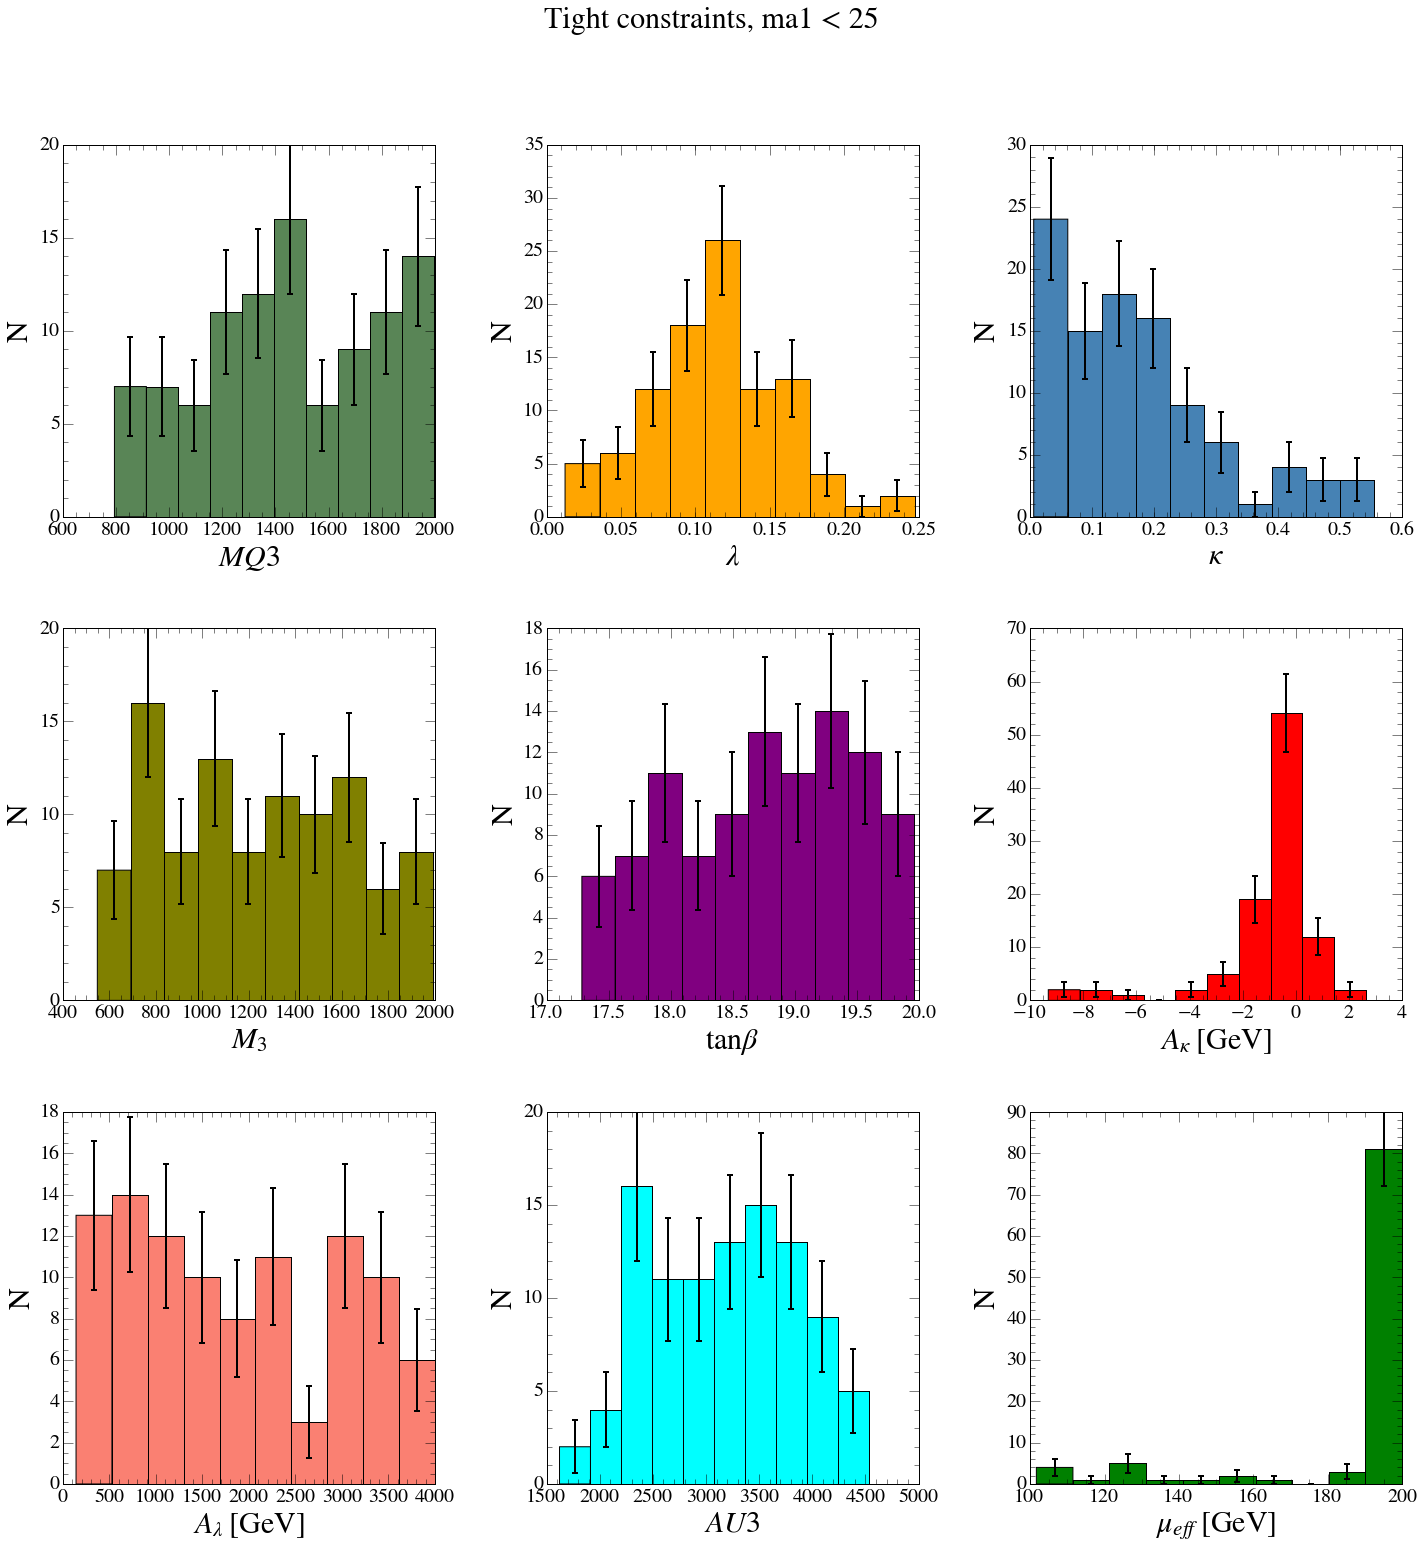

In [54]:
plot_input_params_hists(df_pass_all_strict[df_pass_all_strict.ma1<25], 
                        "N", "Tight constraints, ma1 < 25", bins=10, param_dict=nmssm_params_extended)

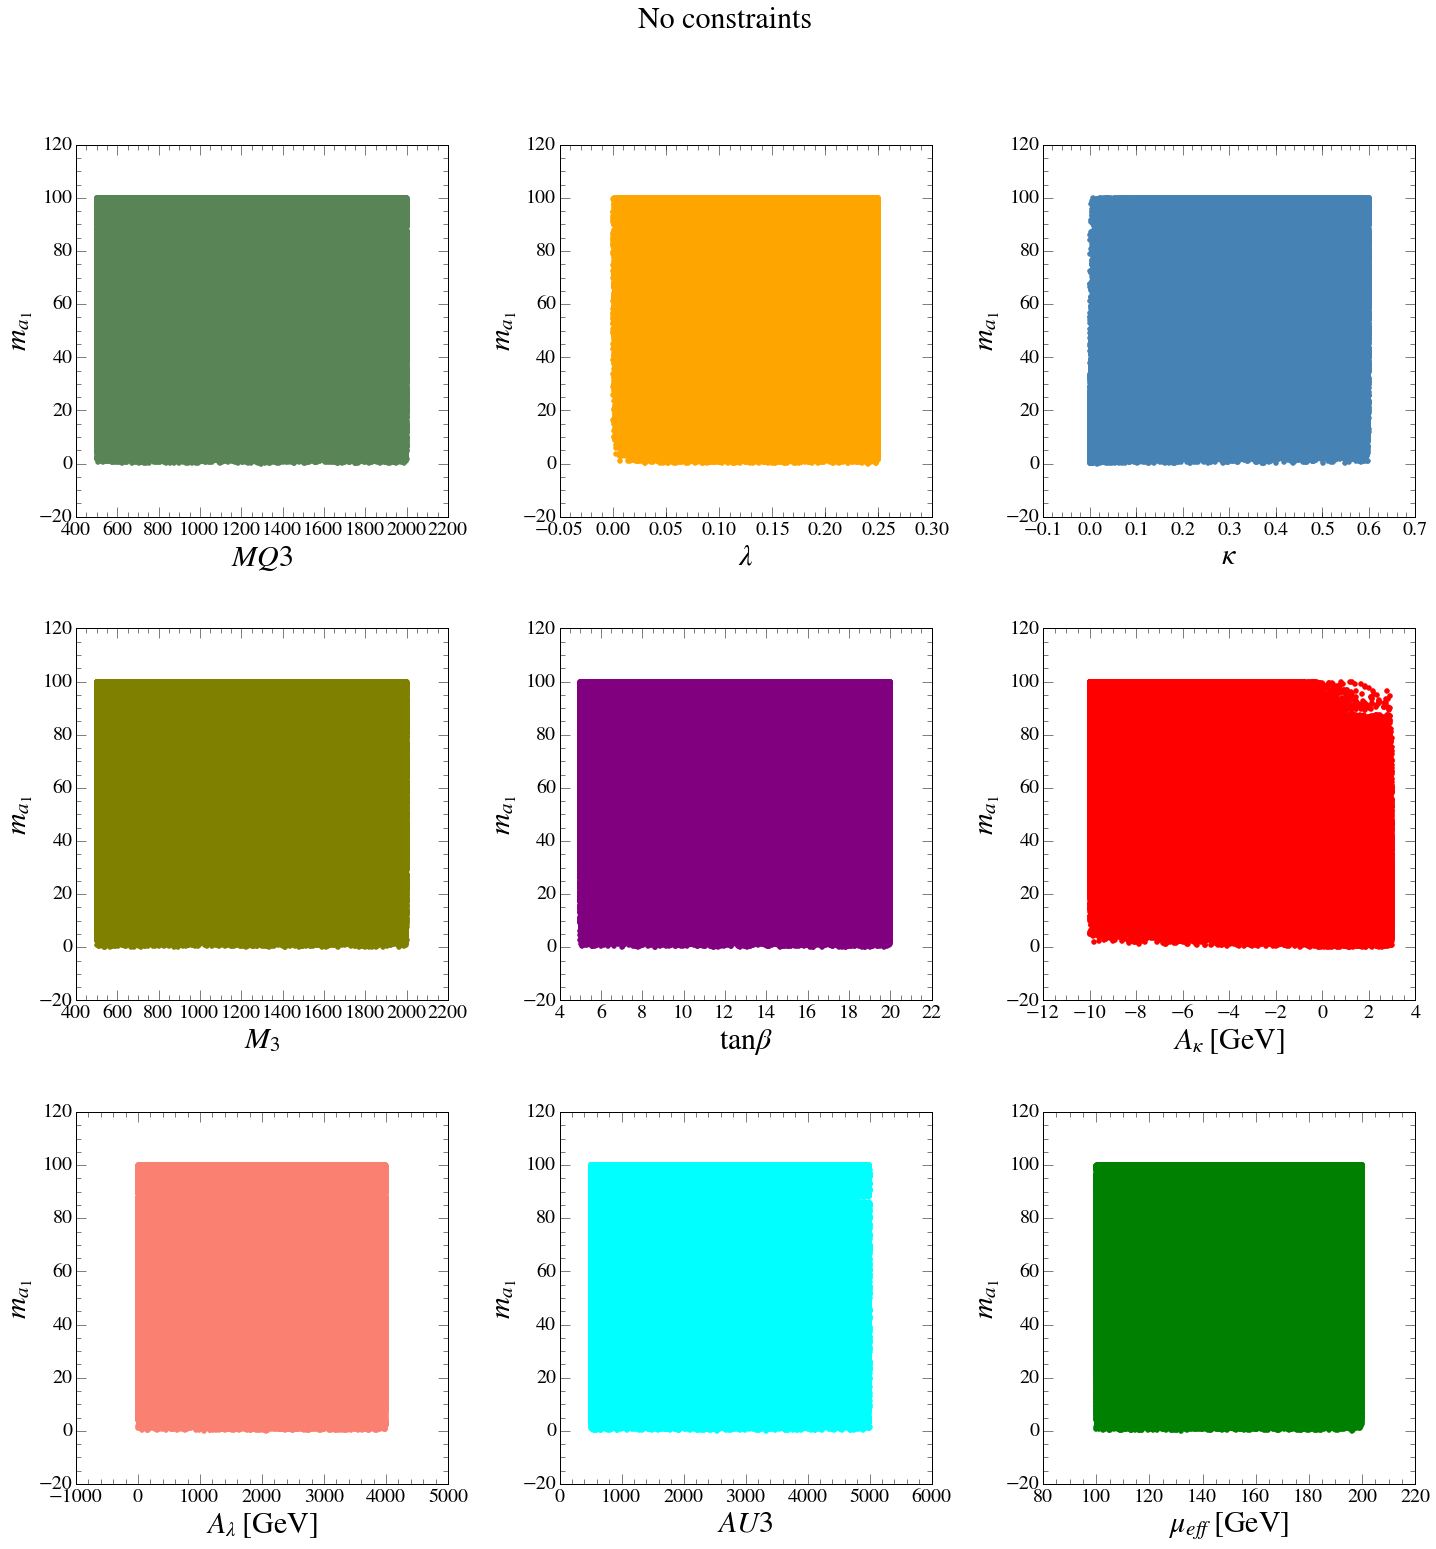

In [48]:
plot_input_params_scatters(df_orig, 'ma1', r"$m_{a_1}$", title="No constraints", param_dict=nmssm_params_extended)

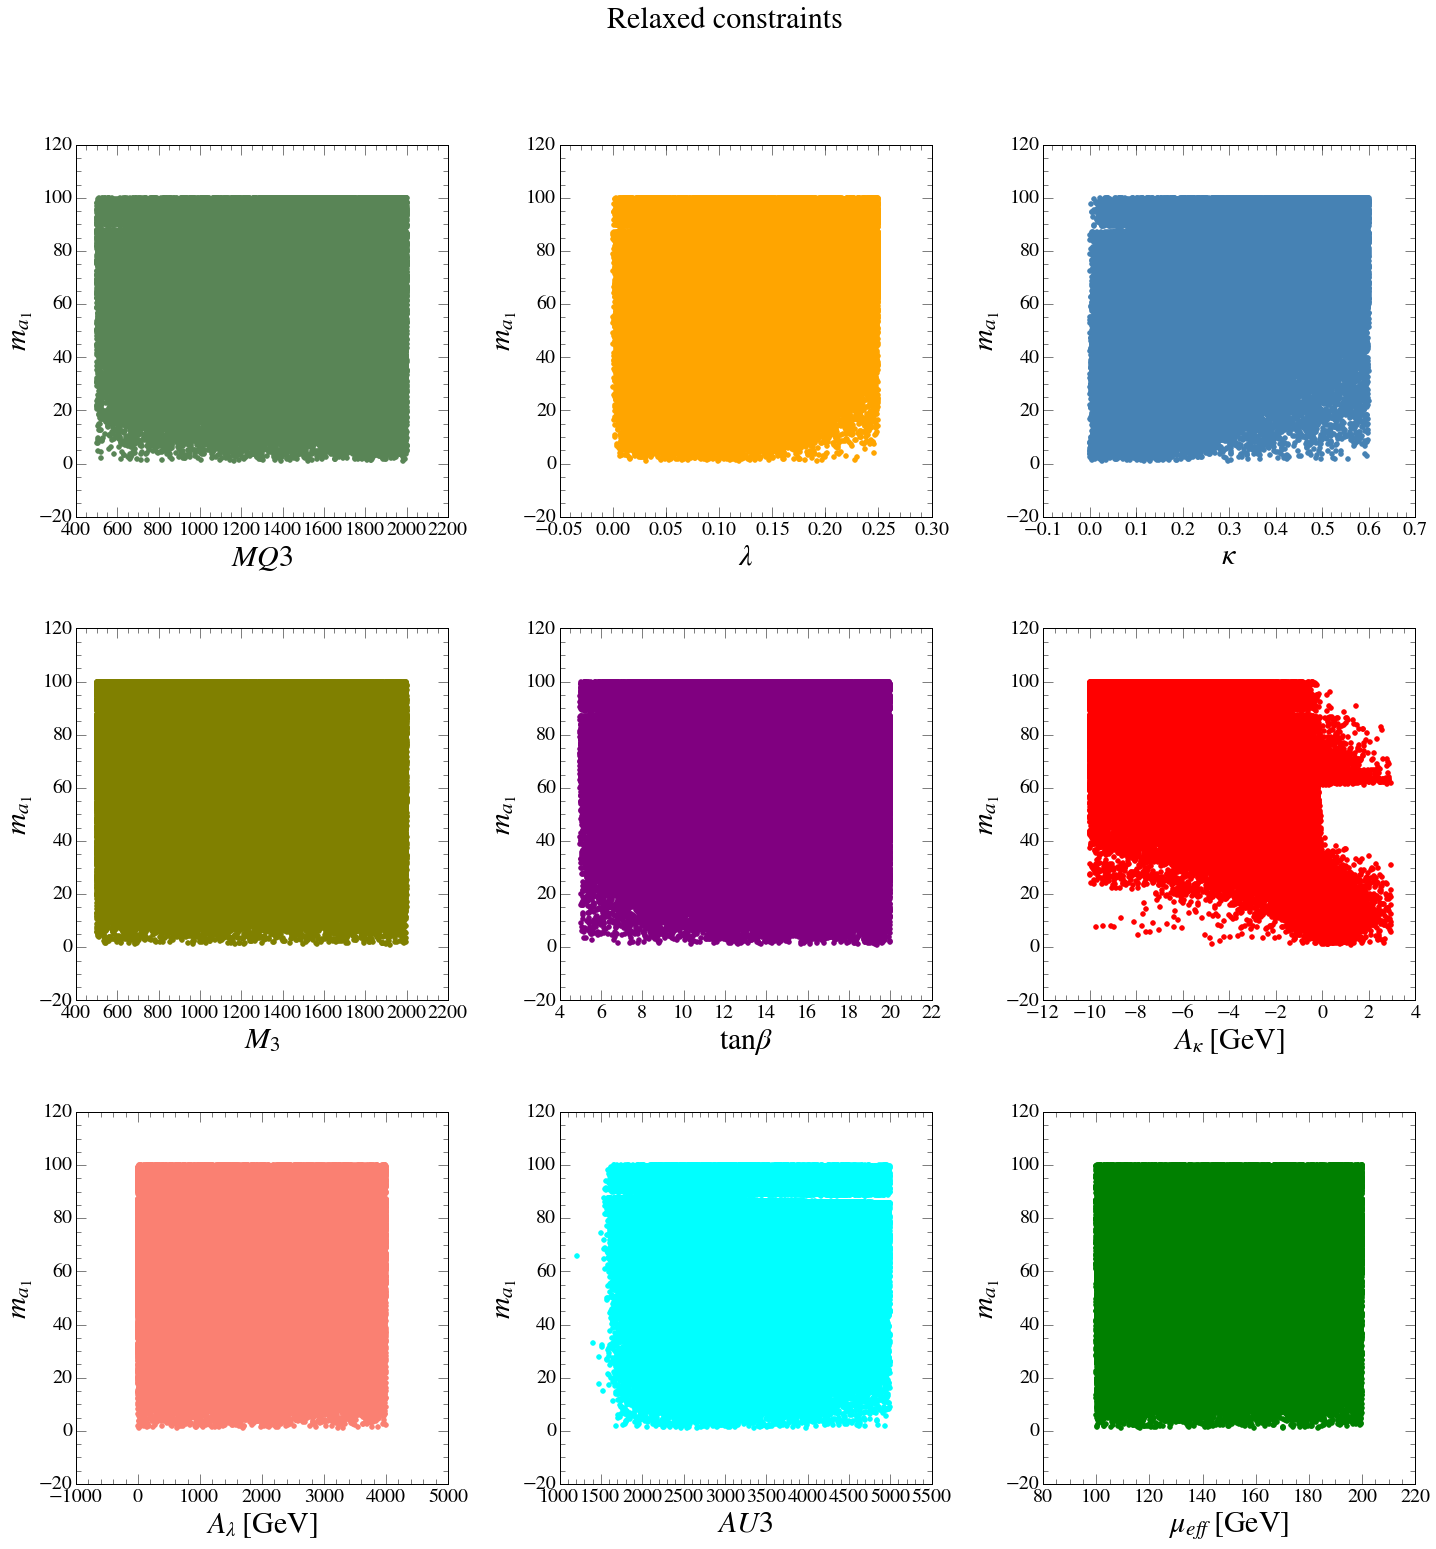

In [49]:
plot_input_params_scatters(df_pass_all, 'ma1', r"$m_{a_1}$", title="Relaxed constraints", param_dict=nmssm_params_extended)

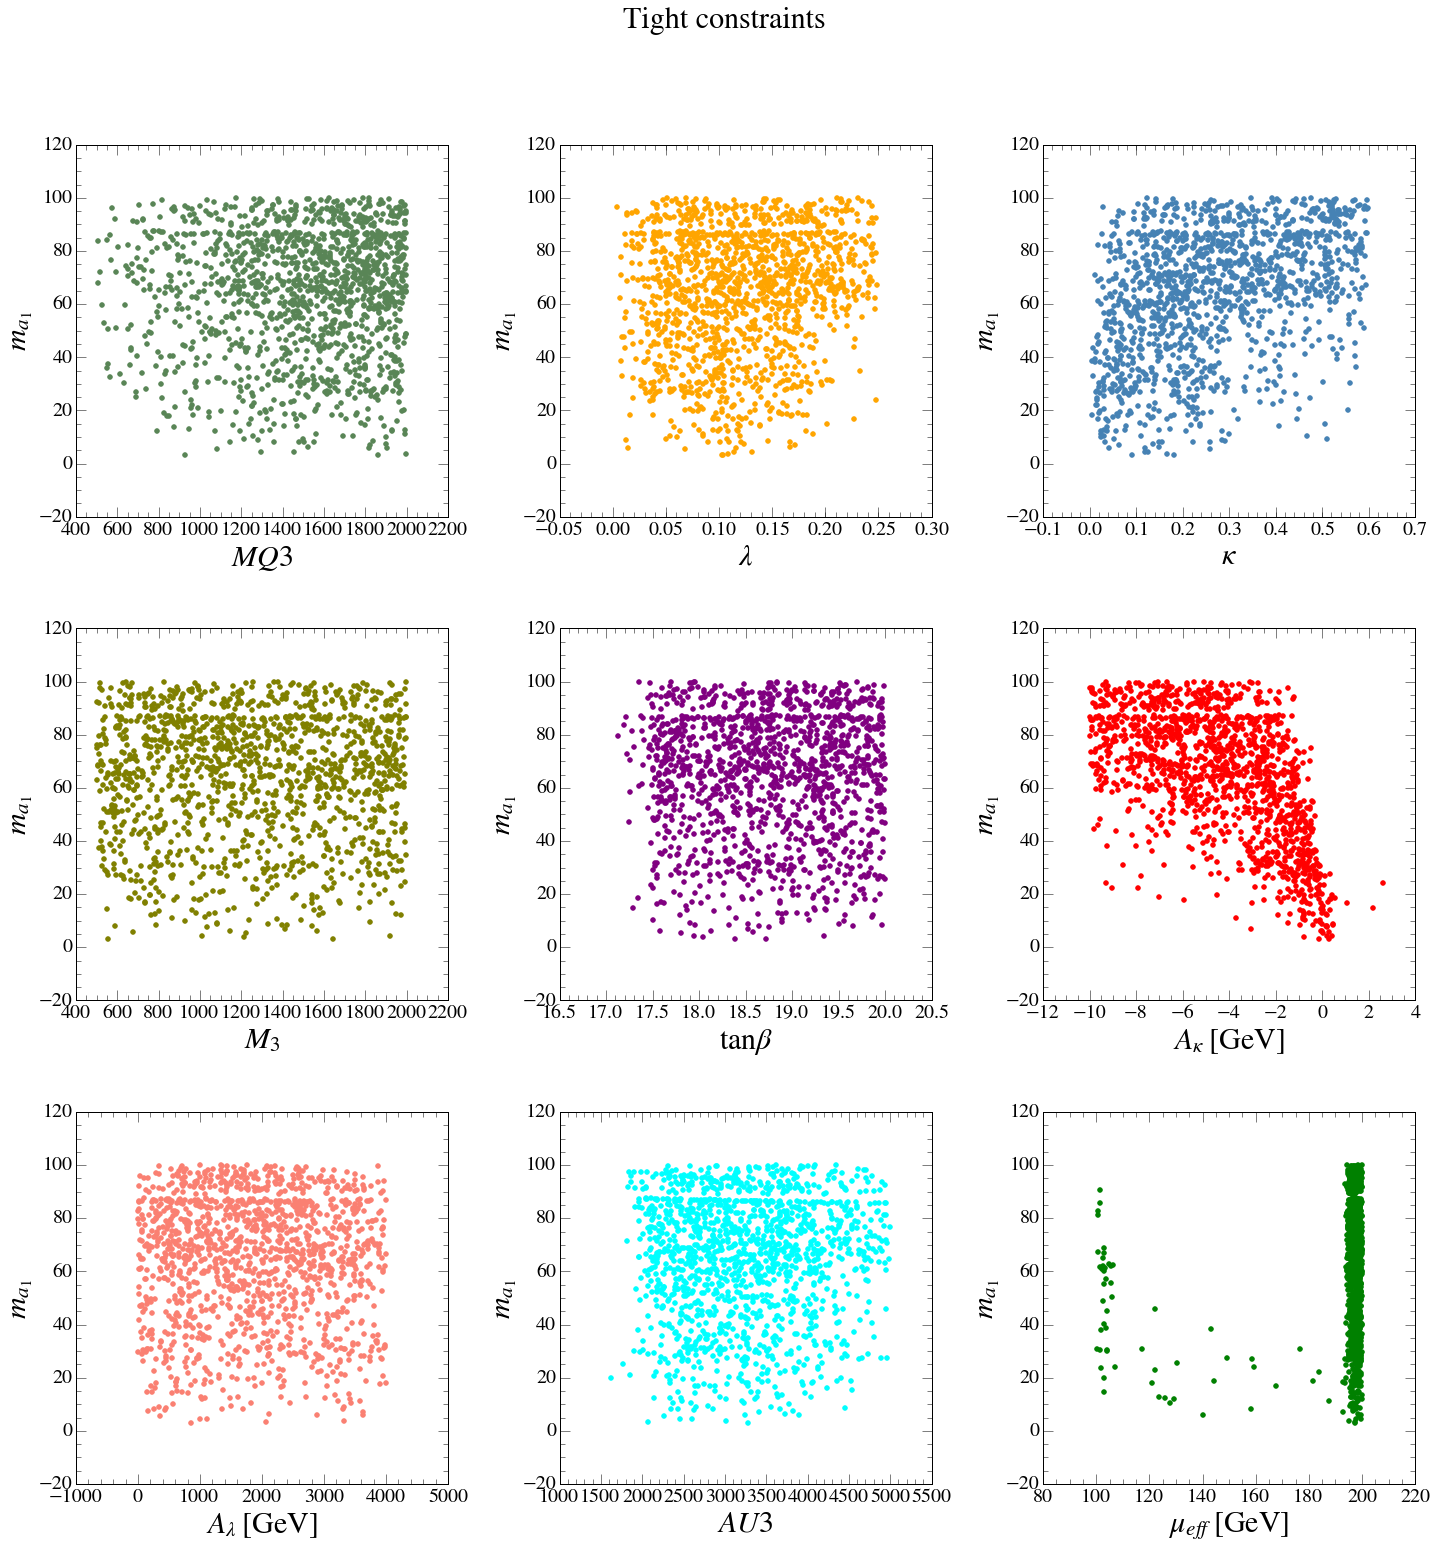

In [50]:
plot_input_params_scatters(df_pass_all_strict, 'ma1', r"$m_{a_1}$", title="Tight constraints", param_dict=nmssm_params_extended)

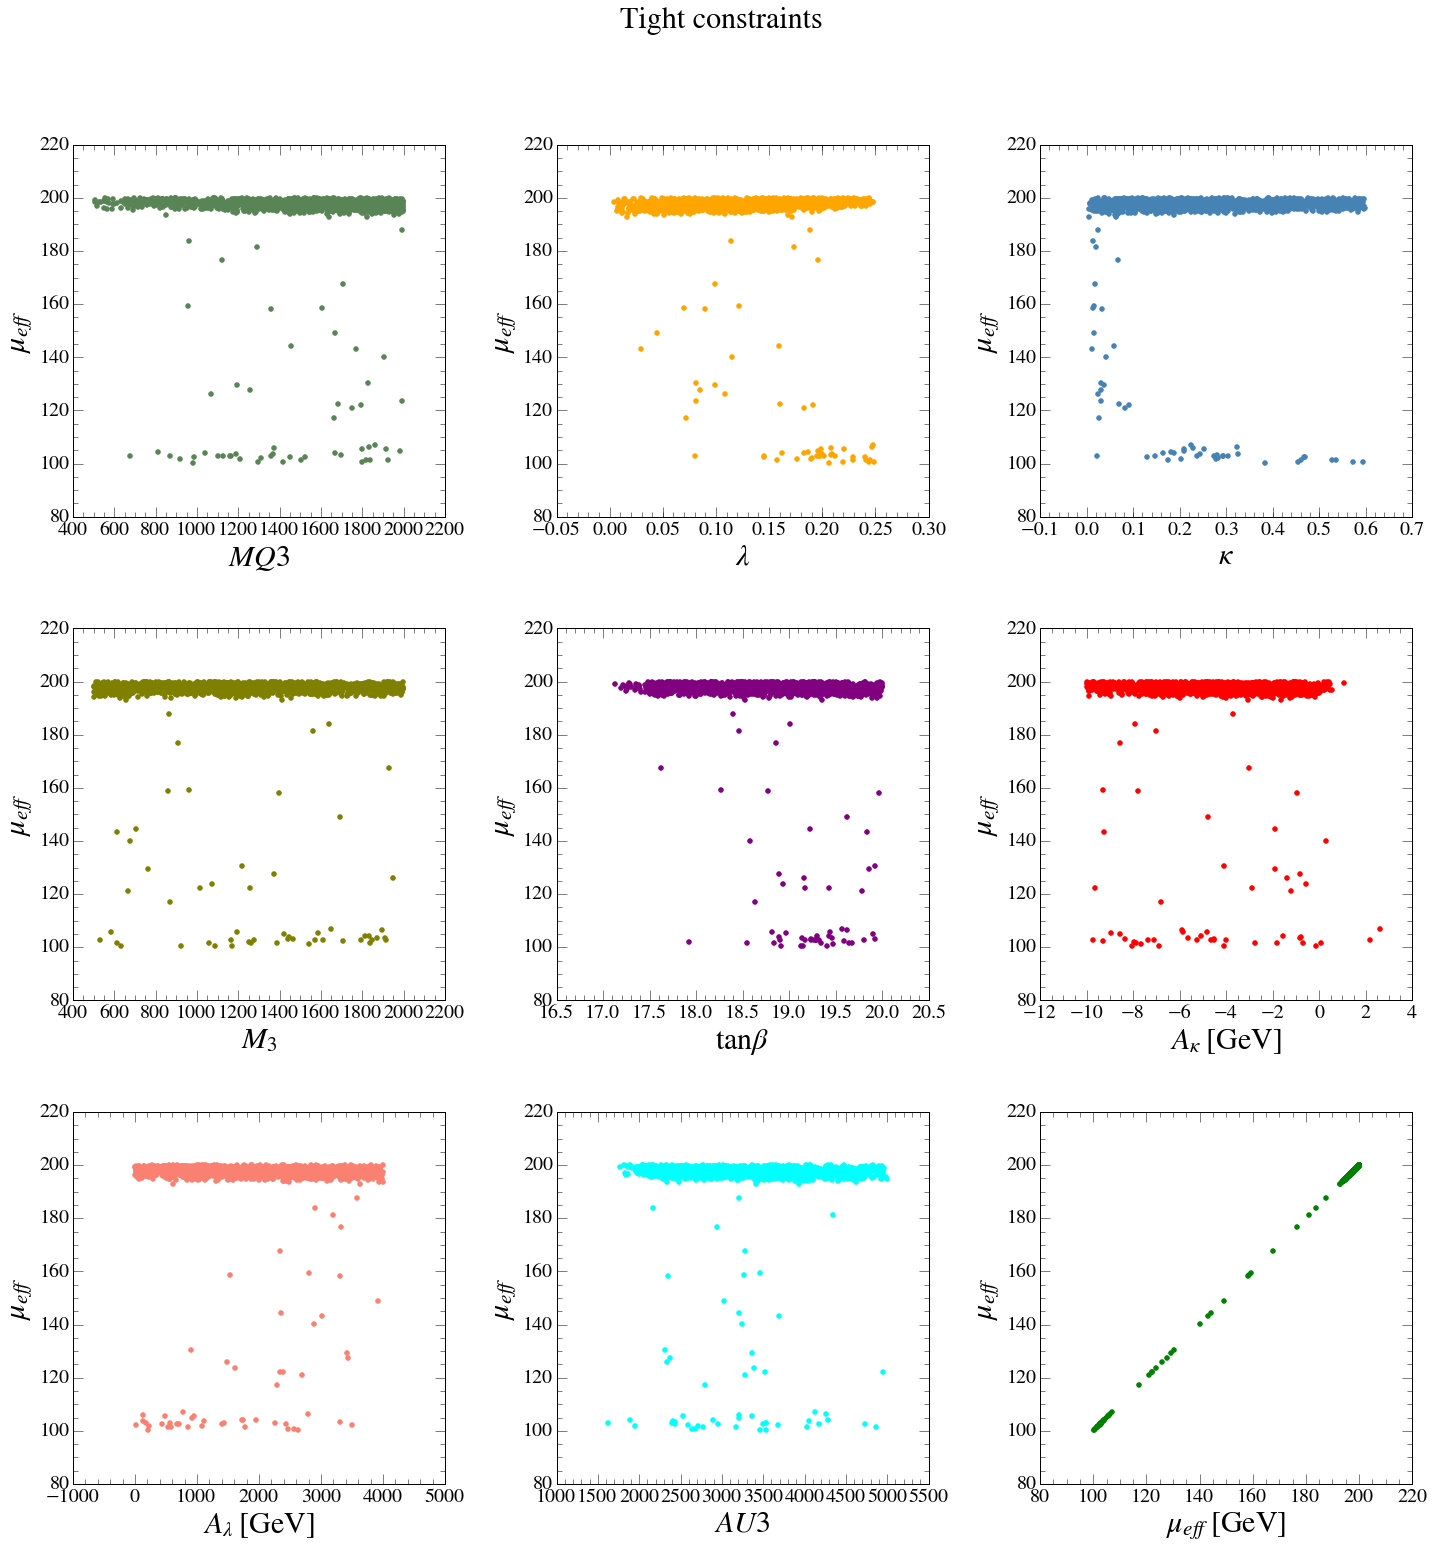

In [51]:
plot_input_params_scatters(df_pass_all_strict, 'mueff', r"$\mu_{eff}$", title="Tight constraints", param_dict=nmssm_params_extended)